In [1]:

from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [2]:
labelencoder = preprocessing.LabelEncoder()

In [3]:
df = pd.read_csv("ford.csv")

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

In [8]:
obj_df = df.select_dtypes(include=['object']).copy()

In [9]:
obj_df.head()

,model,transmission,fuelType
0,Fiesta,Automatic,Petrol
1,Focus,Manual,Petrol
2,Focus,Manual,Petrol
3,Fiesta,Manual,Petrol
4,Fiesta,Automatic,Petrol


In [10]:
obj_df['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [11]:
obj_df['transmission'].value_counts()

Manual       15517
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [12]:
obj_df['fuelType'].value_counts()

Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [13]:
# encode model_enc col
obj_df['model_enc'] = labelencoder.fit_transform(df['model'])

In [14]:
# encode transmission_enc col
obj_df['transmission_enc'] = labelencoder.fit_transform(df['transmission'])

In [15]:
# encode fuelType col
obj_df['fuelType_enc'] = labelencoder.fit_transform(df['fuelType'])

In [32]:
obj_df.columns

Index(['model', 'transmission', 'fuelType', 'model_enc', 'transmission_enc',
       'fuelType_enc'],
      dtype='object')

In [16]:
list(map(set,obj_df.values))

[{' Fiesta', 0, 4, 5, 'Automatic', 'Petrol'},
 {' Focus', 1, 4, 6, 'Manual', 'Petrol'},
 {' Focus', 1, 4, 6, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Fiesta', 0, 4, 5, 'Automatic', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Puma', 1, 16, 4, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Kuga', 0, 13, 'Automatic', 'Diesel'},
 {' Focus', 1, 4, 6, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' EcoSport', 1, 2, 4, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Kuga', 0, 13, 2, 'Diesel', 'Semi-Auto'},
 {' Kuga', 0, 13, 2, 'Diesel', 'Semi-Auto'},
 {' Kuga', 0, 1, 13, 'Diesel', 'Manual'},
 {' Kuga', 0, 1, 13, 'Diesel', 'Manual'},
 {' Kuga', 0, 1, 13, 'Diesel', 'Manual'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Fiesta', 1, 4, 5, 'Manual', 'Petrol'},
 {' Kug

In [17]:
### MODEL CODES

#  B-MAX                        0
#  C-MAX                        1
#  EcoSport                     2
#  Edge                         3
#  Escort                       4
#  Fiesta                       5
#  Focus                        6
#  Fusion                       7
#  Galaxy                       8
#  Grand C-MAX                  9
#  Grand Tourneo Connect        10
#  KA                           11
#  Ka+                          12
#  Kuga                         13
#  Mondeo                       14
#  Mustang                      15
#  Puma                         16
#  Ranger                       17
#  S-MAX                        18
#  Streetka                     19
#  Tourneo Connect              20
#  Tourneo Custom               21
#  Transit Tourneo              22


### TRANSMISSION CODES
#  Automatic                     0
#  Manual                        1
#  Semi-Auto                     2


### FUEL TYPE CODE

#  Diesel                        0
#  Electric                      1
#  Hydbrid                       2
#  Other                         3
#  Petrol                        4


In [55]:
df.loc[df['mpg'] >= 100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6153,13,2020,31000,2,10,2,135,201.8,2.5
6536,13,2020,31991,2,2357,2,135,201.8,2.5
9220,13,2020,32000,0,10,2,140,201.8,2.5
12862,13,2020,33500,0,5534,2,140,201.8,2.5
13730,13,2020,32995,0,11,2,135,201.8,2.5


In [18]:
df['model'] = labelencoder.fit_transform(df['model'])


In [19]:
df['transmission'] = labelencoder.fit_transform(df['transmission'])


In [20]:
df['fuelType'] = labelencoder.fit_transform(df['fuelType'])


In [41]:
# locate car from the year 2060
df.loc[df['year'] >= 2025]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,5,2060,6495,0,54807,4,205,42.8,1.4


In [45]:
# Drop the 2060 ford fiesta
df = df.drop(17726)

In [46]:
# Make sure deleted fiesta
df.loc[df['year'] >= 2025]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


<AxesSubplot:>

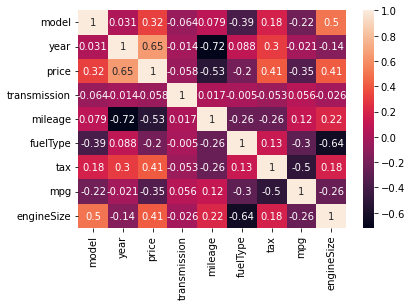

In [47]:
sns.heatmap(df.corr(), annot=True)

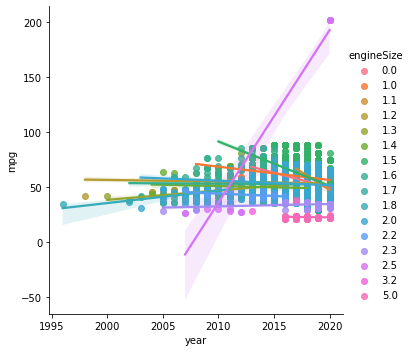

In [48]:
sns.lmplot(x='year', y='mpg', data=df, hue='engineSize')   



<AxesSubplot:>

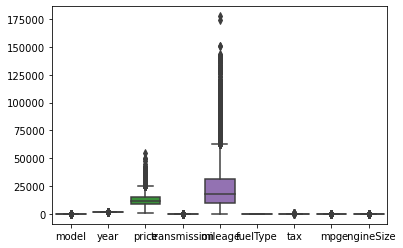

In [40]:
sns.boxplot(data=df)


In [ ]:
stats

<AxesSubplot:xlabel='price', ylabel='year'>

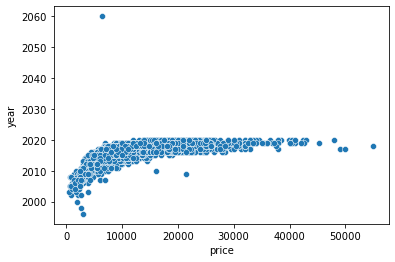

In [26]:
sns.scatterplot(x="price", y="year", data = df)

<AxesSubplot:xlabel='price', ylabel='mileage'>

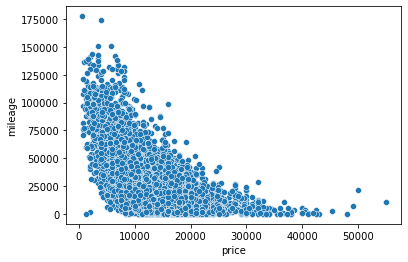

In [27]:
sns.scatterplot(x="price", y="mileage", data = df)

<AxesSubplot:xlabel='engineSize', ylabel='price'>

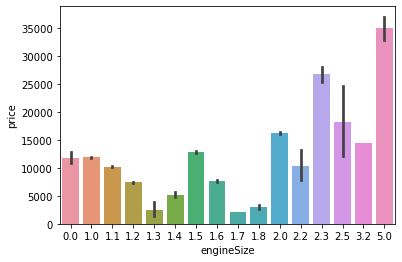

In [28]:
sns.barplot(x="engineSize", y="price", data = df)

<AxesSubplot:xlabel='mpg', ylabel='price'>

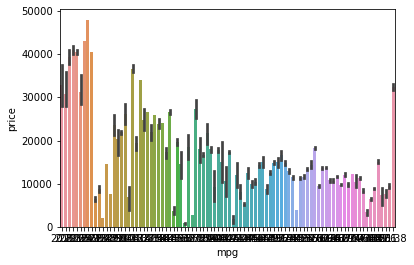

In [29]:
sns.barplot(x="mpg", y="price", data = df)

<AxesSubplot:xlabel='mpg', ylabel='price'>

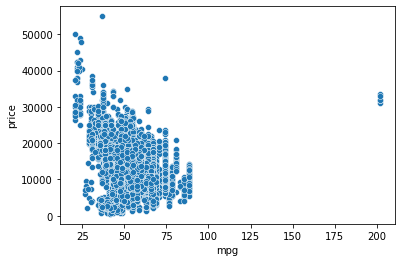

In [30]:
sns.scatterplot(x="mpg", y="price", data = df)